In [1]:
import numpy as np
import pandas as pd


In [2]:
data =pd.read_csv("car_sales_extended.csv")

In [3]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [5]:
data = pd.get_dummies(data, columns = ['Make', 'Colour', 'Doors'])


In [6]:
X = data.iloc[:,:]

y = data.iloc[:,1]

In [7]:
X

,Odometer (KM),Price,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,15323,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,19943,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,28343,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,13434,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,14043,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,32042,0,0,0,1,1,0,0,0,0,0,1,0
996,155144,5716,0,0,1,0,0,0,0,0,1,1,0,0
997,66604,31570,0,0,1,0,0,1,0,0,0,0,1,0
998,215883,4001,0,1,0,0,0,0,0,0,1,0,1,0


In [8]:
X = X.drop('Price', axis = 1)
X

,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Doors_3,Doors_4,Doors_5
0,35431,0,1,0,0,0,0,0,0,1,0,1,0
1,192714,1,0,0,0,0,1,0,0,0,0,0,1
2,84714,0,1,0,0,0,0,0,0,1,0,1,0
3,154365,0,0,0,1,0,0,0,0,1,0,1,0
4,181577,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,35820,0,0,0,1,1,0,0,0,0,0,1,0
996,155144,0,0,1,0,0,0,0,0,1,1,0,0
997,66604,0,0,1,0,0,1,0,0,0,0,1,0
998,215883,0,1,0,0,0,0,0,0,1,0,1,0


<AxesSubplot:>

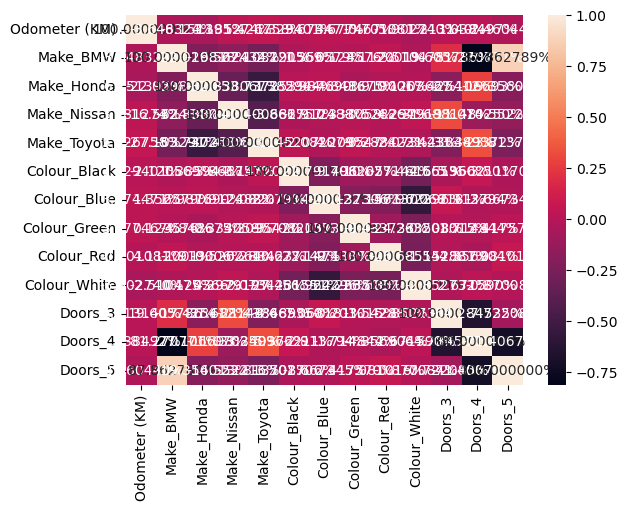

In [9]:
import seaborn as sns
sns.heatmap(X.corr() , annot = True, fmt = '%')


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 11 )

In [11]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit_transform(X_train,Y_train)
sc.fit_transform(X_test,Y_test)


array([[-0.13620628, -0.34251779,  1.56469673, ..., -0.24124895,
         0.41181385, -0.31448545],
       [-1.73988278, -0.34251779,  1.56469673, ..., -0.24124895,
         0.41181385, -0.31448545],
       [ 0.62804366, -0.34251779,  1.56469673, ..., -0.24124895,
         0.41181385, -0.31448545],
       ...,
       [ 0.33876737, -0.34251779, -0.63910148, ...,  4.14509568,
        -2.42828164, -0.31448545],
       [-0.84919353, -0.34251779, -0.63910148, ..., -0.24124895,
         0.41181385, -0.31448545],
       [ 0.72446427, -0.34251779, -0.63910148, ..., -0.24124895,
         0.41181385, -0.31448545]])

In [12]:
Y_train

832     9878
797    13394
49      9928
867    11733
514    16519
       ...  
337     8064
91     18595
80      8200
703     9104
921     8321
Name: Price, Length: 800, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
log =  LinearRegression()
log.fit(X_train, Y_train)
log.predict(X_test)
log.score(X_test,Y_test)

0.3507878474058639

In [14]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 4)
forest.fit(X_train, Y_train)
forest.predict(X_test)
forest.score(X_test,Y_test)

0.16680210823879105